In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv('diamonds.csv')
df.head()
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:

df.rename(columns={'x':'length','y':'width','z':'depth','depth':'depth%','table':'table%'},inplace=True)
df.head()
df['L/W']= df['length']/df['width']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth%   53940 non-null  float64
 5   table%   53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
 10  L/W      53933 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.9+ MB


In [9]:
df.rename({'x':'length','y':'width','z':'depth','depth':'depth%','table':'table%'},inplace=True)

In [10]:
df.head()
df['L/W']= df['length']/df['width']
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth%   53940 non-null  float64
 5   table%   53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
 10  L/W      53933 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.3+ MB


(53940, 11)

In [11]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())
df.describe()
df.describe(include='all')

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


,carat,cut,color,clarity,depth%,table%,price,length,width,depth,L/W
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944


In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table%     0
price      0
length     0
width      0
depth      0
L/W        7
dtype: int64

In [13]:
df[['length','width','depth','L/W']]=df[['length','width','depth','L/W']].replace(0,np.NaN)


In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table%     0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64

<Figure size 1000x700 with 0 Axes>

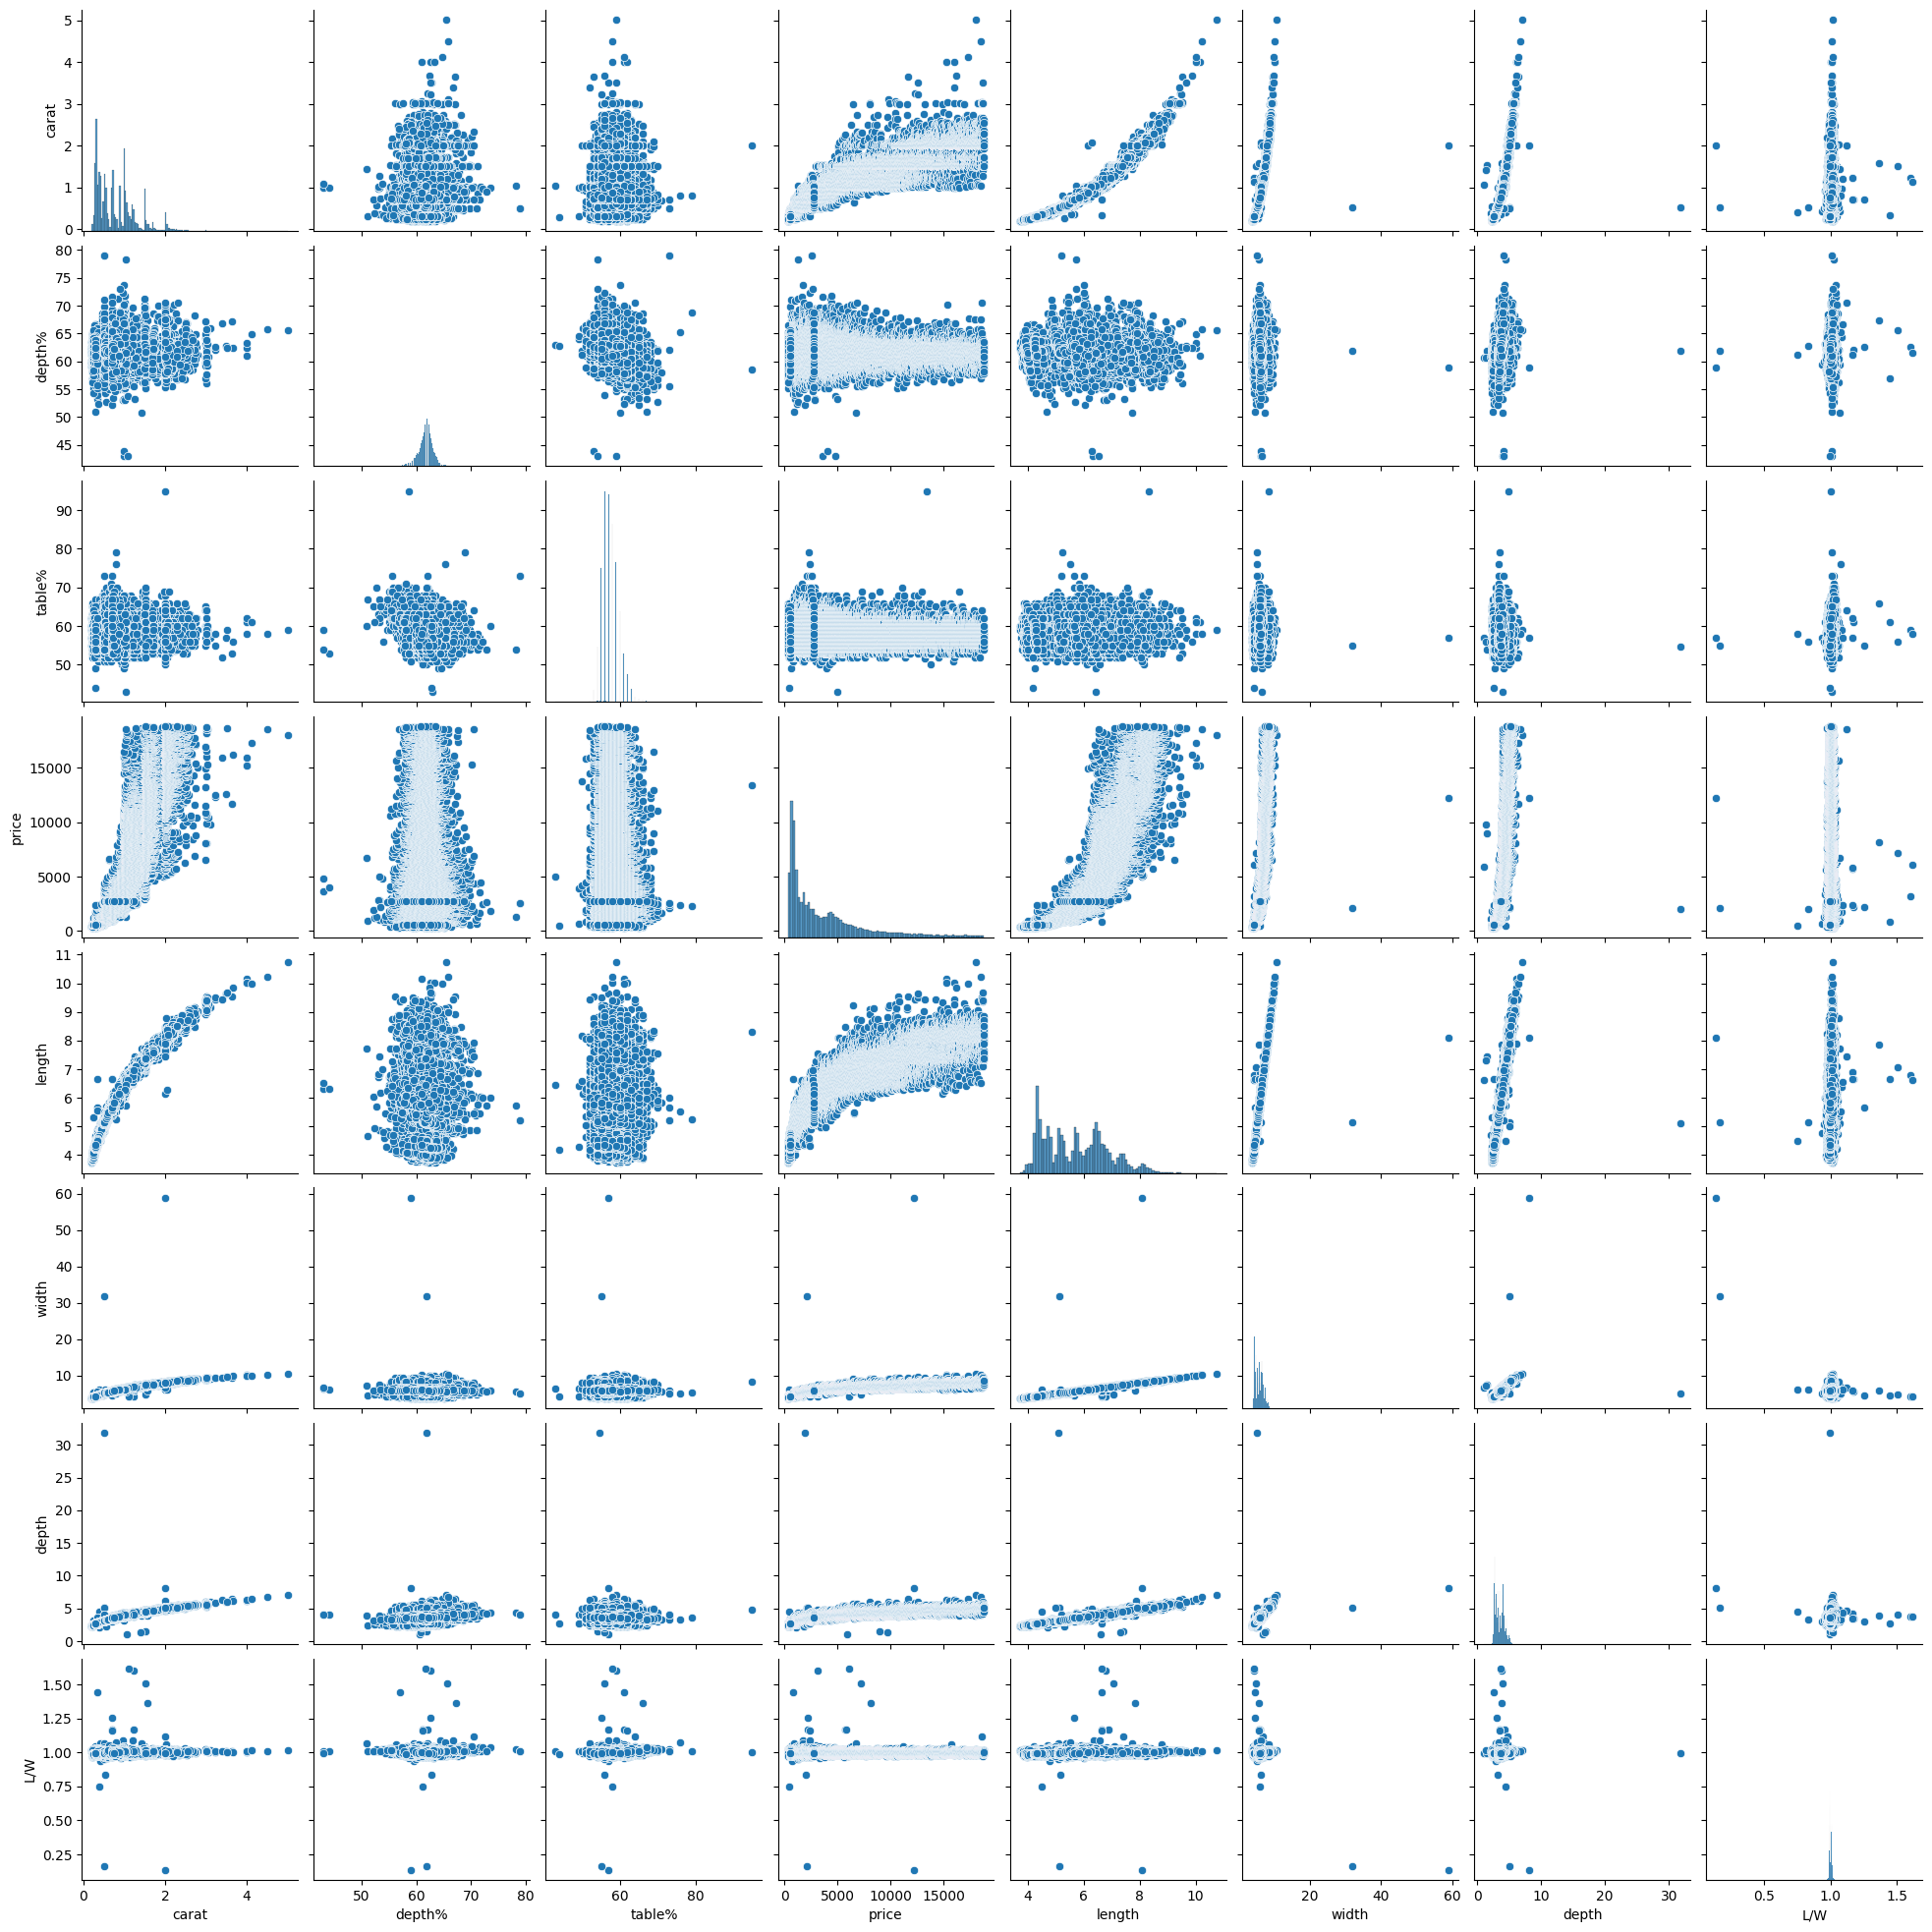

<Figure size 1000x700 with 0 Axes>

In [16]:
numerical = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical = df.loc[:, ~df.columns.isin(numerical)].columns
numerical, categorical
sns.pairplot(df)

plt.figure(figsize = (10,7))


<AxesSubplot:>

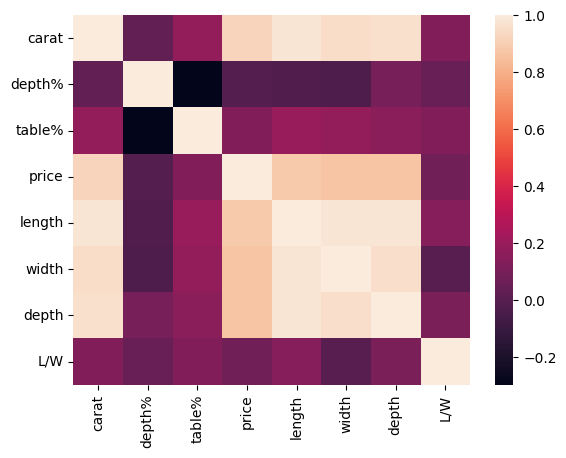

In [17]:
sns.heatmap(df.corr())


<AxesSubplot:xlabel='clarity'>

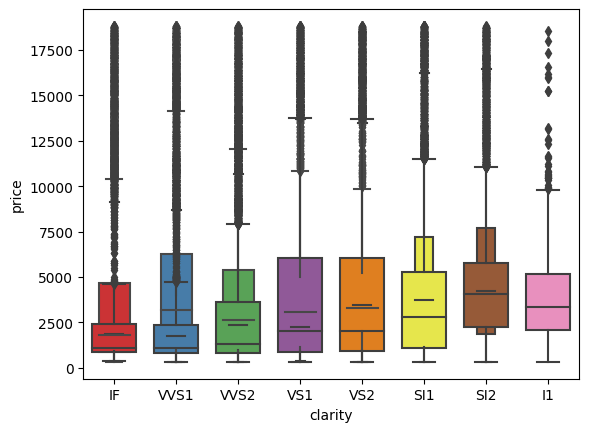

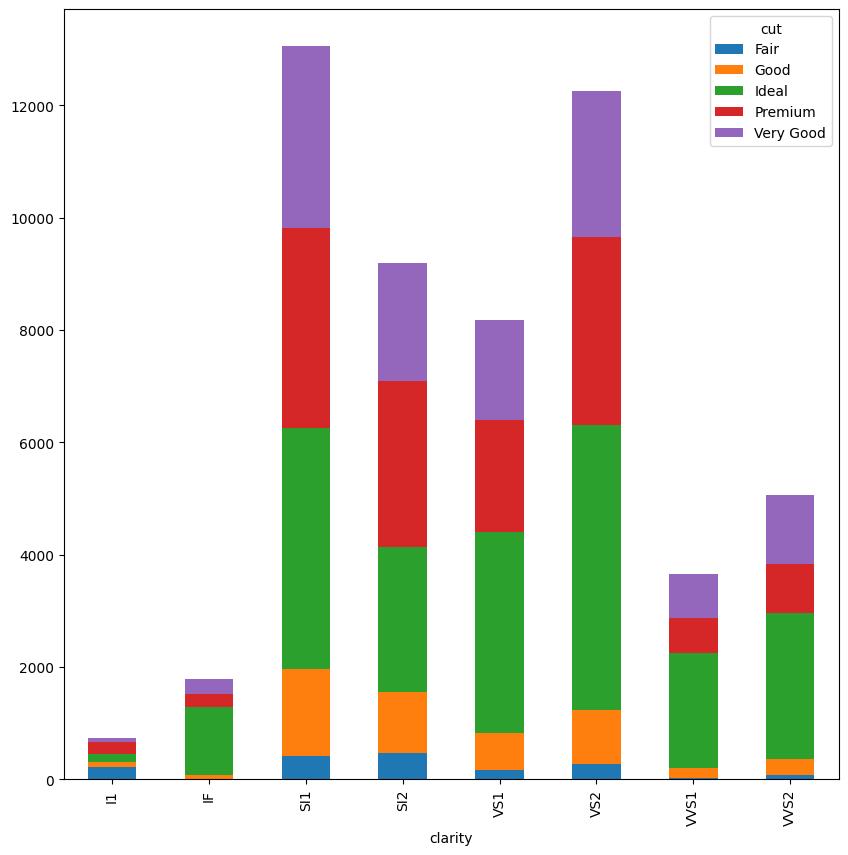

In [18]:
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0)]
sns.boxplot( y='price' , data=df , x='color' , palette='Set1' , width=0.3 , order=['D','E','F','G','H','I','J'])
sns.boxplot( y='price' , data=df , x='cut' , palette='Set1' , width=0.5 , order=['Ideal','Premium','Very Good','Good','Fair'])
sns.boxplot( y='price' , data=df , x='clarity' , palette='Set1' , width=0.7 , order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])
clarity_cut_table = pd.crosstab(index=df['clarity'],columns=df['cut'])
clarity_cut_table.plot(kind='bar',figsize=(10,10),stacked=True)


<AxesSubplot:xlabel='color'>

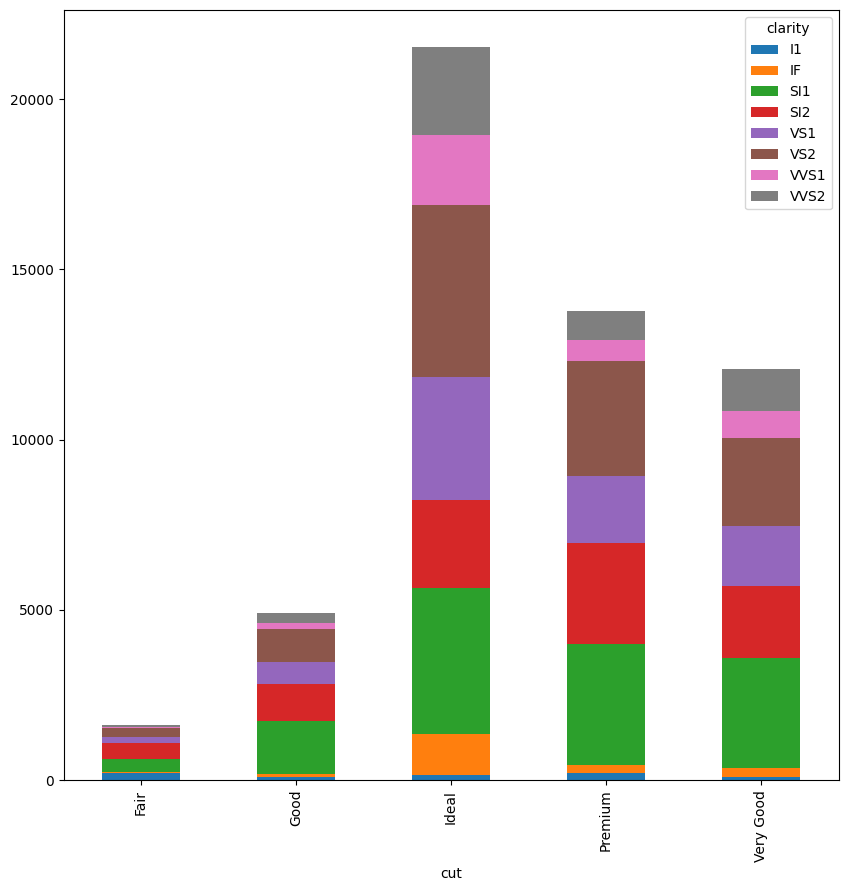

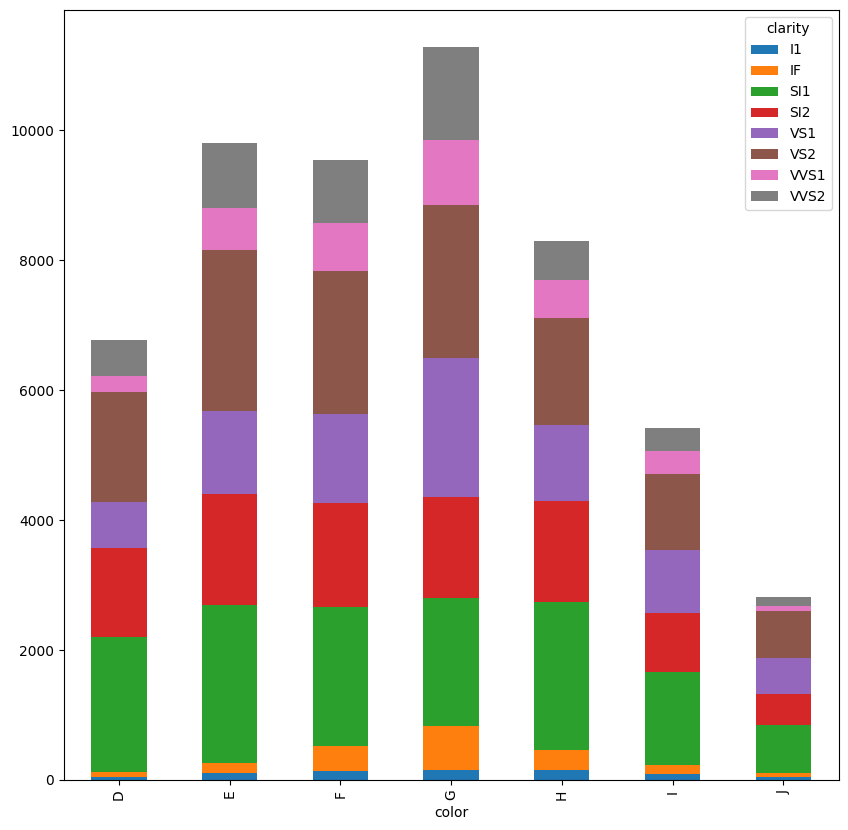

In [19]:

cut_clarity_table = pd.crosstab(index=df['cut'],columns=df['clarity'])
cut_clarity_table.plot(kind='bar',figsize=(10,10),stacked=True)
color_clarity_table = pd.crosstab(index=df['color'],columns=df['clarity'])
color_clarity_table.plot(kind='bar',figsize=(10,10),stacked=True)

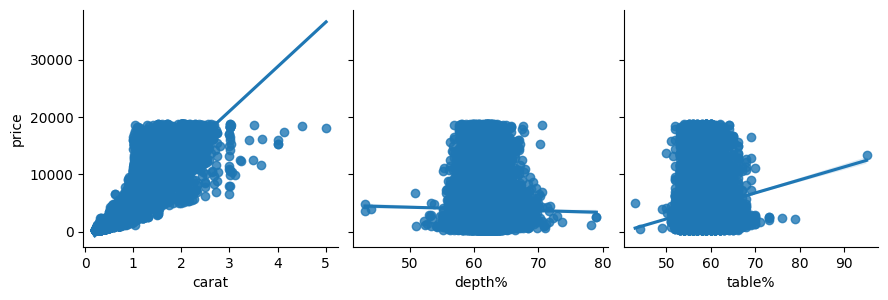

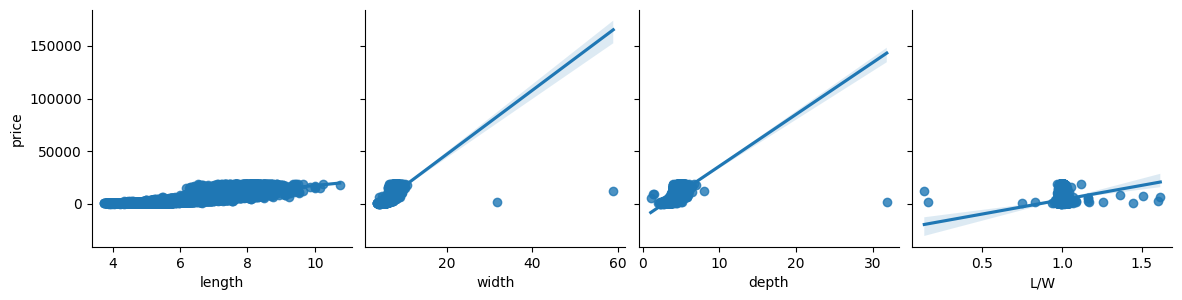

In [20]:

g = sns.pairplot(df , height = 3 , aspect = 1 , x_vars = ['carat','depth%','table%'] , y_vars = ['price'] , kind = 'reg')
g = sns.pairplot(df , height = 3 , aspect = 1 , x_vars = ['length','width','depth','L/W'] , y_vars = ['price'] , kind = 'reg')

In [21]:

df.head()
def CutEncoding(cut):
    value =-1
    if (cut=='Ideal'):
        value=4
    elif (cut=='Premium'):
        value=3
    elif (cut=='Good'):
        value=2
    elif (cut=='Very Good'):
        value=1
    elif (cut=='Fair'):
        value=0
    return value

print("Cut Feature before Encoding:",*df['cut'].unique())
df['cut'] = df['cut'].apply(lambda x:CutEncoding(x))
print("Cut Feature after Encoding:",*df['cut'].unique())

Cut Feature before Encoding: Ideal Premium Good Very Good Fair
Cut Feature after Encoding: 4 3 2 1 0


In [22]:
from sklearn.preprocessing import LabelEncoder


# In[30]:


ColorEncoder = LabelEncoder()
print("Color Feature before Encoding:",*df['color'].unique())
df.color = ColorEncoder.fit_transform(df.color)
print("Color Feature after Encoding:",*df['color'].unique())


# In[31]:


ClarityEncoder = LabelEncoder()
print("Clarity Feature before Encoding:",*df['clarity'].unique())
df.clarity = ClarityEncoder.fit_transform(df.clarity)
print("Clarity Feature after Encoding:",*df['clarity'].unique())


Color Feature before Encoding: E I J H F G D
Color Feature after Encoding: 1 5 6 4 2 3 0
Clarity Feature before Encoding: SI2 SI1 VS1 VS2 VVS2 VVS1 I1 IF
Clarity Feature after Encoding: 3 2 4 5 7 6 0 1


In [23]:

X = df.drop('price', axis = 1)
y = df.price
X.head()
y.head()
df.head(10)

,carat,cut,color,clarity,depth%,table%,price,length,width,depth,L/W
0,0.23,4,1,3,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,2,1,4,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,2,6,3,63.3,58.0,335,4.34,4.35,2.75,0.997701
5,0.24,1,6,7,62.8,57.0,336,3.94,3.96,2.48,0.994949
6,0.24,1,5,6,62.3,57.0,336,3.95,3.98,2.47,0.992462
7,0.26,1,4,2,61.9,55.0,337,4.07,4.11,2.53,0.990268
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49,1.023810
9,0.23,1,4,4,59.4,61.0,338,4.00,4.05,2.39,0.987654


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
def minkowski_distance(a,b,p=1):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)
    return distance

In [26]:
minkowski_distance(a=X.iloc[0],b=X.iloc[1],p=1)


10.060558521775548

In [27]:
from sklearn.neighbors import KNeighborsRegressor
score = []

for k in range(1,20):     # Running for Different K Values to know which yields the max accuracy 
    clf = KNeighborsRegressor(n_neighbors = k , weights = 'distance' , p = 1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test,y_test))

In [28]:
k_max = score.index(max(score)) + 1
print("At k = {}, Max Accuracy = {}".format(k_max,max(score)*100))


# In[40]:


clf = KNeighborsRegressor(n_neighbors = k , weights = 'distance' , p = 1)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
print(y_pred[0])

At k = 7, Max Accuracy = 96.36162117198951
0.9610382708724605
528.3344632882978


In [29]:
y_train.head()

37046     967
6002     3959
41628     504
858      2871
53328    2654
Name: price, dtype: int64

In [30]:
def knn_predict(X_train,X_test,y_train,y_test,k,p):
    
    #Counter to help with Label Voting
    from collections import Counter
    
    #Make Predictions on the Test Data
    #Need output of 1 Prediction per test data point
    y_hat_test = []
    
    for test_point in X_test[:3]:
        distances = []
        print('first')
        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        print('second')
        
        #Store Distances in a Dataframe
        df_dists = pd.DataFrame(data=distances, columns = ['dist'], index = y_train.index)
        print('third')
        print(df_dists.shape)
        
        #Sort Distances , and only consider the k closest Points
        df_nn = df_dists.sort_values(by = ['dist'],axis=0)[:k]
        #Create Counter Object to Track the Labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])
        
        df_nn['y_train_pred'] = counter
        print('fourth')
        
        #Get most Common Label of all the Nearest Neighbors
        prediction = df_nn['y_train_pred'].mean()
        
        #Append Prediction to Output List
        y_hat_test.append(prediction)
        
    return y_hat_test

In [31]:
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k = 7, p = 1)      # WITHOUT SKLEARN
print(y_hat_test)


first
second
third
(40440, 1)
fourth
first
second
third
(40440, 1)
fourth
first
second
third
(40440, 1)
fourth
[491.85714285714283, 2947.8571428571427, 11414.857142857143]


In [32]:
clf = KNeighborsRegressor(n_neighbors = 7 , weights = 'distance' , p = 1)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])

0.9636162117198951
483.66676658213055
2965.464777927421
11498.819248747497


In [33]:
class KNearestNeighbors():
    def __init__(self,k):
        self.k = 1
        
    def train(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        return self.predict_labels(distances)
    
    def compute_distance(self ,X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))
    
        for i in range(num_test):
            for j in range(num_train):
                distances[i,j] = np.sqrt(np.sum((X_test[i,:] - self.X_train[j,:])**2))
        return distances
    
    def predict_labels(self,distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            y_indices = np.argsort(distances[i,:])
            k_closest_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))
            
        return y_pred

In [36]:
def main():
    
    df = pd.read_csv('diamonds.csv',nrows = 1000)
    
    label = LabelEncoder()
    
    df['cut'] = label.fit_transform(df['cut'].astype('str'))
    df['color'] = label.fit_transform(df['color'].astype('str'))
    df['clarity'] = label.fit_transform(df['clarity'].astype('str'))
    
    # Features
    X = df.drop('price',axis=1).values
    # Target Feature
    y = df['price'].values
    
    # Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None)
    
    # Scaling
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fitting the Model
    KNN = KNearestNeighbors( k = 3 )
    KNN.train( X_train , y_train )
    
    # Prediction
    y_pred = KNN.predict(X_test)
    
    # Check Accuracy of Model
    print('Accuracy of the Scratch Model :',r2_score( y_test , y_pred ))
    
    # Fitting the Model by sklearn
    knn = KNeighborsRegressor( n_neighbors = 3 )
    knn.fit( X_train , y_train )
    y_pred_sklearn = knn.predict( X_test )
    
    # Check Accuracy of the sklearn Model
    print('Accuracy of the sklearn Model :',r2_score( y_test , y_pred_sklearn ))

In [37]:
if __name__ == '__main__' :
    main()
# # Conclusions : From Scratch and sklearn models, we get almost the same outputs for y_pred and y_hat_test
# In[51]:
import plotly.graph_objects as go
# In[52]
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import os
# In[54]:
trace0 = go.Scatter(
    y = y_test,
    x = np. arange(200),
    mode = 'lines',
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(10,150,50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200),
    mode = 'lines',
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(110 , 50 , 140)',
        dash = 'dot'
    )
)
layout = go.Layout(
    xaxis = dict(title = 'Index'),
    yaxis = dict(title = 'Normalized Price')
)
figure = go.Figure(data = [ trace0 , trace1 ], layout = layout)
iplot(figure)


Accuracy of the Scratch Model : 0.9947200650128529
Accuracy of the sklearn Model : 0.9962023739806305
